In [140]:
from PIL import Image
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [576]:
im = Image.open('GMMSegmentTestImage.jpg')
pix = im.load()
width = im.size[0]
height = im.size[1]
RGB = [[0] * width ] * height
rg = []
co = []
for x in range(height):
    for y in range(width):
        r, g, b = pix[x, y]
        RGB[x][y] = [r,g,b]
        rg.append([r/(r+b+g), g/(r+b+g)]) # convert into 2D rg chromaticity space.
        co.append((r/(r+b+g), g/(r+b+g),b/(r+b+g))) # RGB to rgb

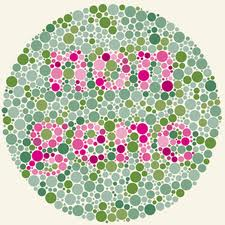

In [775]:
im

In [778]:
width = im.size[0]
height = im.size[1]
im_out = im.copy()
pix_out = im_out.load()
co_out = np.array(co).reshape((height,width,3))
for x in range(height):
    for y in range(width):
        alpha = 255/(t[x][y].max())
        r_out = round(alpha*t[x][y][0])
        g_out = round(alpha*t[x][y][1])
        b_out = round(alpha*t[x][y][2])
        pix_out[x, y] = (r_out,g_out,b_out)

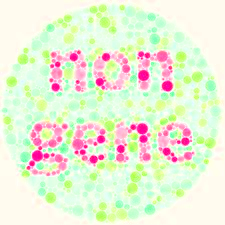

In [1813]:
im_out

In [716]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """用给定的位置和协方差画一个椭圆"""
    ax = ax or plt.gca()

    #将协方差转换为主轴
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    #画出椭圆
    for nsig in range(1, 4):
        ellipse = Ellipse(position, nsig * width, nsig * height,angle, **kwargs)
        ax.add_patch(ellipse)
        ellipse.set(fc='None',ls='-.',ec='blue',alpha=0.6,lw=1)

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=3, cmap='viridis')
    ax.scatter(gmm.means_[:,0],gmm.means_[:,1],s=50,marker='+',c='r')
    plt.xlabel('r')
    plt.ylabel('g')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

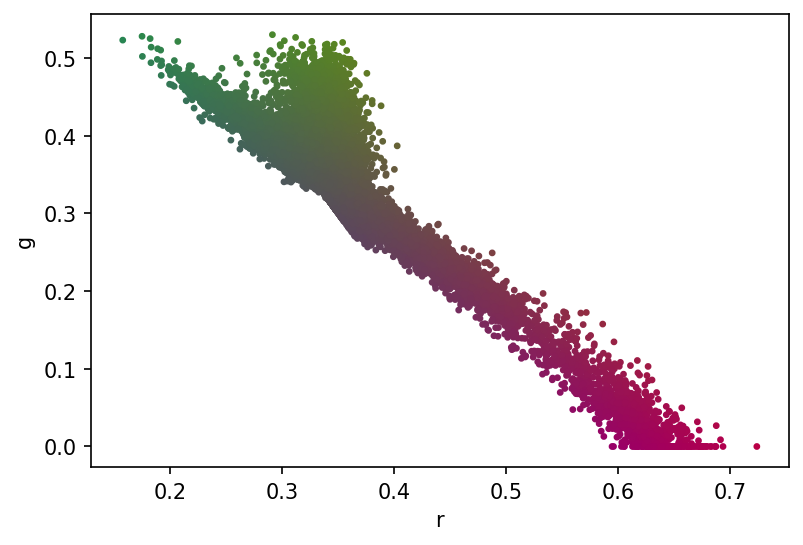

In [743]:
a = np.array(rg).reshape(-1,2)
plt.scatter(a[:,0],a[:,1],s=5,c=co)
plt.xlabel('r')
plt.ylabel('g')
plt.rcParams['figure.dpi'] = 150
plt.show()

In [1794]:
import random
K=5
# mu=random.choices(rg,k=K)
# mu = np.random.uniform(0,1,[K,2])
mu = np.zeros([K,2])
for i in range(5):
    mu[i][0] = np.random.uniform(0.28,0.63)
    mu[i][1] = np.random.uniform(0,0.45)
cov = np.array([np.eye(2)] * K) * 0.1
w = np.array([1.0 / K] * K)

In [1795]:
gmm = GaussianMixture(n_components=K,verbose=1,means_init=mu,weights_init=w)
# gmm = GaussianMixture(n_components=K,verbose=1)
gmm.fit(rg)
labels = gmm.predict(rg)

Initialization 0
  Iteration 10
Initialization converged: True


In [1796]:
print(mu)
print(gmm.means_)
print(gmm.covariances_)

[[0.34581286 0.38686504]
 [0.48469827 0.29300924]
 [0.58125622 0.10776948]
 [0.51513471 0.1530242 ]
 [0.40044773 0.18621831]]
[[0.32873347 0.35026798]
 [0.33652509 0.39387318]
 [0.39266155 0.28468275]
 [0.48216282 0.19795738]
 [0.39203062 0.27941323]]
[[[ 2.73557756e-04 -2.56296637e-04]
  [-2.56296637e-04  2.66748967e-04]]

 [[ 1.93867777e-04 -2.78671763e-05]
  [-2.78671763e-05  1.45188965e-03]]

 [[ 1.38196887e-02 -1.48986811e-02]
  [-1.48986811e-02  1.63619781e-02]]

 [[ 1.59104285e-04 -9.82335112e-05]
  [-9.82335112e-05  1.23508706e-04]]

 [[ 9.18969911e-04 -7.33075767e-04]
  [-7.33075767e-04  6.37352599e-04]]]


Initialization 0
  Iteration 10
Initialization converged: True


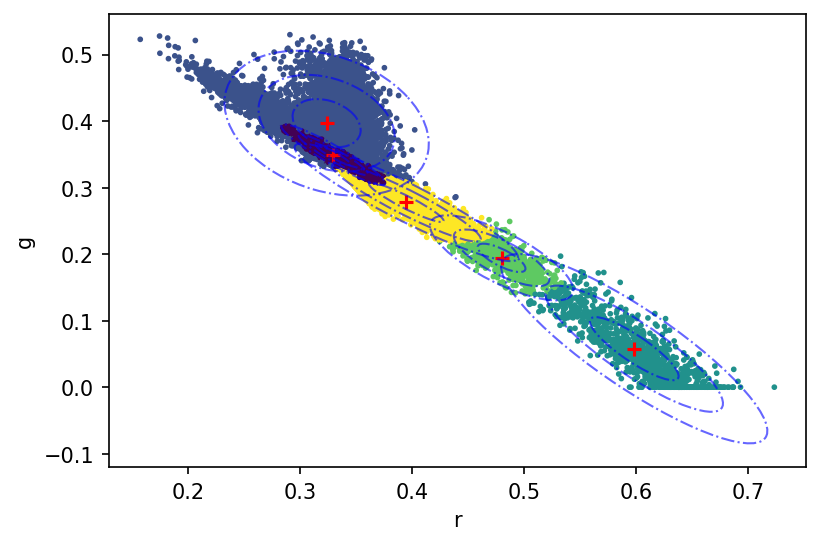

In [1797]:
plot_gmm(gmm,a)

In [1798]:
post_p=gmm.predict_proba(rg)
post_p=post_p.reshape((height,width,K))

def norm(im,j,p=post_p):
    pix = im.load()
    width = im.size[0]
    height = im.size[1]
    for x in range(height):
        for y in range(width):
            value = round(255 * p[x][y][j])
            pix[x, y] = (value,value,value)
    return pix


im1 = im.copy()
pix1 = im1.load()
pix1 = norm(im1,0)
im2 = im.copy()
pix2 = im2.load()
pix2 = norm(im2,1)
im3 = im.copy()
pix3 = im3.load()
pix3 = norm(im3,2)

im4 = im.copy()
pix4 = im4.load()
pix4 = norm(im4,3)

im5 = im.copy()
pix5 = im5.load()
pix5 = norm(im5,4)

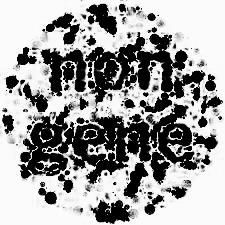

In [1799]:
im1

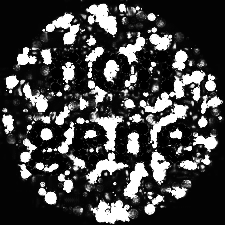

In [1800]:
im2

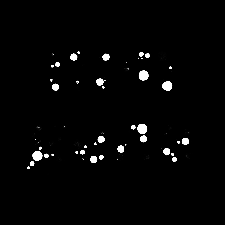

In [1801]:
im3

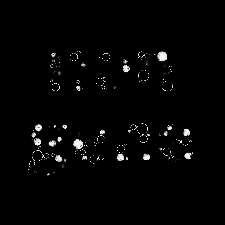

In [1802]:
im4

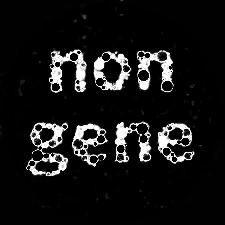

In [1803]:
im5